## Team members :Sathiya Ramesh, Pradheep Krishna Muthukrishnan Padmanabhan, Naresh Kumar Gurulingan

Let's suppose we have a set of observations $x=(x_1,…,x_N)^T$, that are drawn independent and identically distributed (i.i.d) from a Gaussian distribution with unknown mean $\mu$ and variance $\sigma^2$

For this example, we are going to assume that the unknown parameters are $\mu$=2 and $\sigma^2$=25 and the number of samples N=100.

#Task1:# 
Plot this (unknown) distribution together with the samples in the range [-20, 20].

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
import seaborn as sb
from __future__ import division

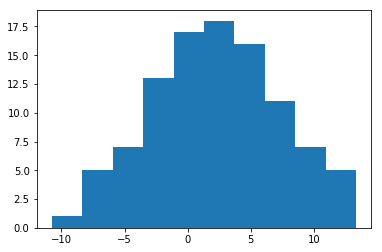

In [2]:
np.random.seed(0)
mu = 2
sigma = 5
samples = 100
distribution = np.random.normal(mu, sigma, samples)
plt.hist(distribution, bins= 10)
plt.show()

#Task2:#
* Implement the likelihood function in python (you can simply use the existing python implementations)
* Use a general optimization method to find the values for $\mu$ and $\sigma^2$.

In [3]:
estimated_mu, estimated_sigma = stats.norm.fit(distribution)
print('Estimated mean is {}(using MLE)'.format(estimated_mu))
print('Estimated variance is {}(using MLE)'.format(estimated_sigma))

Estimated mean is 2.2990400776724247(using MLE)
Estimated variance is 5.039411223582898(using MLE)


In [4]:
print('The difference between the actual and estimated mean is {}'.
      format(np.abs(mu - estimated_mu)))
print('The difference between the actual and estimated variance is {}'.
      format(np.abs(sigma - estimated_sigma)))

The difference between the actual and estimated mean is 0.2990400776724247
The difference between the actual and estimated variance is 0.03941122358289828


#Task3:#
Given:
<br>
$\mu = \begin{bmatrix}
      0\\[0.3em]
      0\\[0.3em]
     \end{bmatrix}$
<br>
$\Sigma = \begin{bmatrix}
      0.5 & 0\\[0.3em]
      0 & 0.5\\[0.3em]
     \end{bmatrix}$
<br>
1. Visualise a Gaussian with the given parameters.
2. Visualise a marginal Gaussian.
3. Visualise a slice of Gaussian.

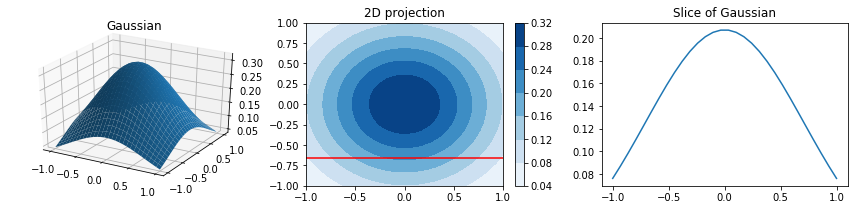

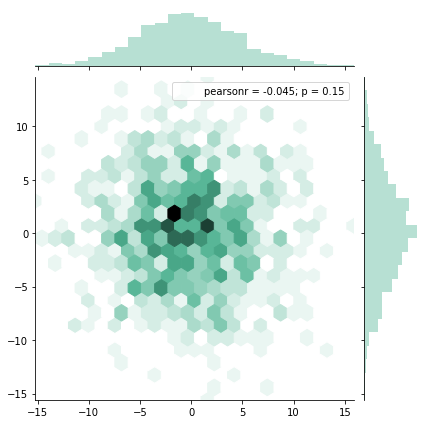

In [5]:
# https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
# https://stackoverflow.com/questions/28342968/how-to-plot-a-2d-gaussian-with-different-sigma
mu = np.array([0., 0.])
covariance = np.array([[0.5, 0], [0, 0.5]])
x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
xy = np.column_stack([x.flat, y.flat])

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)
sli = 5


fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(3)
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(x,y,z)
#ax.plot_wireframe(x,y,z)
plt.title('Gaussian')
fig.add_subplot(132)
plt.plot([-1,1], y[0:2,sli], color= 'r')
plt.title('2D projection')
plt.contourf(x, y, z, cmap='Blues')
plt.colorbar()
fig.add_subplot(133)
plt.title('Slice of Gaussian')
plt.plot(x[:,0],z[0:,sli])
plt.show()

x=np.random.normal(loc=0,scale=5,size=1000)
y=np.random.normal(loc=0,scale=5,size=1000)
sb.jointplot(x, y, kind="hex",color="#4CB391")

#Task4:#
Given:
    <br>
    Number of samples is 1000 from them 330 samples are labeled as class $A$ and 670 samples 
    are labeled as class $B$. There are 2 features $X1$ and $X2$. It is observed that  $p(A,X1)$=248,  $p(A,X2)$=82, $p(B,X1)$=168, $p(B,X2)$=502
    <br>
Compute:
<br>
Prior $p(A)$, $p(B)$
<br>
Likelihood $p(X1|A)$, $p(X1|B)$
<br>
Posterior $p(A|X1)$

In [6]:
S = 1000.0
C_a = 330.0 
C_b = 670
p_A_X1 = 248 
P_A_X2 = 82
P_B_X1 = 168
P_B_X2 = 502
#Now finding the prior for the given problem
P_A = C_a/S
P_B = C_b/S 
print ('Prior of A = ',P_A,'Prior of B = ',P_B)
#Now finding the Likelihood
P_x1A = p_A_X1/P_A
P_x1B = P_B_X1/P_B
print ('Likelihood p(X1|A)=',P_x1A,'Likelihood p(X1|B)',P_x1B)
P_x2A = P_A_X2/P_A
P_x2B = P_B_X2/P_B
#Calculating the Posterior
P_AX1 = P_x1A * P_A/((P_x1A*P_A)+(P_x1B*P_B)) #Likelihood x Prior
print ('Posterior:p(A|X1)=',P_AX1)

Prior of A =  0.33 Prior of B =  0.67
Likelihood p(X1|A)= 751.5151515151515 Likelihood p(X1|B) 250.7462686567164
Posterior:p(A|X1)= 0.5961538461538461
